In [1]:
from pprint import pprint
import numpy as np
from scipy import sparse
import math
from matplotlib import pyplot as plt

In [3]:
Nx = 25
Ny = 25
x = np.linspace(0,1,Nx)
y = np.linspace(0,1,Ny)

In [13]:
def Build_Sparse_A_Neumann(Nx, Ny):
    """Builds the A matrix for a 5 point stencil Poisson Solver
    
    Params:
    -------
    Nx, Ny     float, number of points in x and y
    
    Returns:
    -------
    A          Penta-diagonal sparse matrix A
    """
    
    A = sparse.diags([-4]*Nx*Ny, 0) #set leading Diaganol
    A = A + sparse.diags([1]*(Nx-1)+([0]+[1]*(Nx-1))*(Ny-1), 1) #set first diagonal above main
    A = A + sparse.diags([1]*(Nx-1)+([0]+[1]*(Nx-1))*(Ny-1), -1) #set first diagonal below main
    A = A + sparse.diags([1]*(Nx*Ny-Nx), Nx) #sets second diagonal above main
    A = A + sparse.diags([1]*(Nx*Ny-Nx), -Nx) #sets second diagonal below main
    
    return A

In [14]:
A = Build_Sparse_A_Neumann(Nx, Ny)
print A

  (0, 0)	-4.0
  (0, 1)	1.0
  (0, 25)	1.0
  (1, 0)	1.0
  (1, 1)	-4.0
  (1, 2)	1.0
  (1, 26)	1.0
  (2, 1)	1.0
  (2, 2)	-4.0
  (2, 3)	1.0
  (2, 27)	1.0
  (3, 2)	1.0
  (3, 3)	-4.0
  (3, 4)	1.0
  (3, 28)	1.0
  (4, 3)	1.0
  (4, 4)	-4.0
  (4, 5)	1.0
  (4, 29)	1.0
  (5, 4)	1.0
  (5, 5)	-4.0
  (5, 6)	1.0
  (5, 30)	1.0
  (6, 5)	1.0
  (6, 6)	-4.0
  :	:
  (618, 618)	-4.0
  (618, 619)	1.0
  (619, 594)	1.0
  (619, 618)	1.0
  (619, 619)	-4.0
  (619, 620)	1.0
  (620, 595)	1.0
  (620, 619)	1.0
  (620, 620)	-4.0
  (620, 621)	1.0
  (621, 596)	1.0
  (621, 620)	1.0
  (621, 621)	-4.0
  (621, 622)	1.0
  (622, 597)	1.0
  (622, 621)	1.0
  (622, 622)	-4.0
  (622, 623)	1.0
  (623, 598)	1.0
  (623, 622)	1.0
  (623, 623)	-4.0
  (623, 624)	1.0
  (624, 599)	1.0
  (624, 623)	1.0
  (624, 624)	-4.0


In [8]:
def Poisson_Solver_Dirichlet(x, y, Nx, Ny):
    """Solves the 2D Poisson equation implicitly on a staggered grid using Dirichlet Boundary Conditions
    
    Params:
    ------
    u, v           2D array of float, x and y velocities
    Nx, Ny       float, Number of segments in x and y
    dt             float, time step size
    
    Returns:
    -------
    A           2D array of float, A matrix with Dirichlet conditions
    f_RHS       1D array of float, f(x,y) for Dirichlet conditions
    """

    A = np.zeros((Nx*Ny,Nx*Ny),dtype=float)

    #Building A
    a = Nx * Ny
    b = Nx * Ny
    c = -4 * (Nx * Ny)
    d = Nx * Ny
    e = Nx * Ny

    #Set corner points
    A[0,0] = c
    A[-1,-1] = c
    A[-1*Ny,-1*Nx] = c
    A[Nx-1,Ny-1] = c

    #Set edges in first block
    for j in range(1,Ny-1):
        A[j,j] = c
        j +=j

    #Set edges in last block
    for j in range((Nx*Ny)-Ny,(Nx*Ny)-2):
        A[j+1,j+1] = c
        j +=j

    #Set edges along main diagonal except for first block
    for j in range(Nx+1,Ny*Nx):
        if j % Nx ==0:
            #ADir[j,j] = c_edge
            A[j-1,j-1] = c
        j +=j

    #Set edges on main diagonal except for last block
    for j in range(Nx,(Ny*Nx)-Nx):
        if j % Nx ==0:
            A[j,j] = c
            #ANeum[j-1,j-1] = c_edge
        j +=j

    #Second diagonal above and below diagonal
    for j in range(Ny,Ny*Nx):
        A[j,j-Ny] = a
        A[j-Nx,j] = e
        j +=j

    #first diagonal below main diagonal   
    for j in range(1,Ny*Nx):
        if j % Ny ==0:
            A[j,j-1] = 0
        else:
            A[j,j-1] = b
        j +=j

    #first diagonal above main diagonal
    for j in range(0,Ny*Nx):
        if j % Nx ==0:
            A[j-1,j] = 0
        else:
            A[j-1,j] = d
        j +=j

    #Main Diagonal
    for j in range(0,Ny*Nx):
        if A[j,j] ==0:
            A[j,j] = c

    f_RHS = np.zeros((Nx*Ny,1), dtype=float)
    for i in range(0,Nx-1):
        for j in range(0,Ny-1):
            f_RHS[i,0] = 2*(1+y[i,j])/((3+x[i,j])**2 + (1+y[i,j])**2)
    
    return A, f_RHS

In [13]:
X, Y = np.meshgrid(x,y)
A, f_RHS = Poisson_Solver_Dirichlet(X, Y, Nx, Ny)
temp = np.linalg.solve(A,f_RHS)
p = np.reshape(temp, (Nx,Ny))

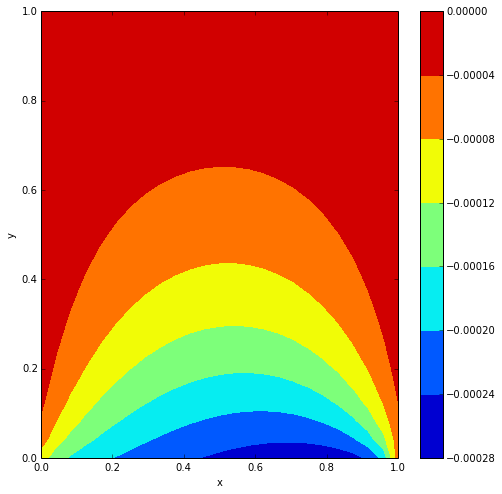

In [15]:
%matplotlib inline
size=8
plt.figure(figsize=(size,size))
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('x')
plt.ylabel('y')
contf = plt.contourf(X, Y, p)
cbar = plt.colorbar(contf)